<a href="https://colab.research.google.com/github/ioadeer/bi-bycing-ba-2021/blob/main/Cleaning_Recorridos_de_bicicletas_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import sys

import urllib.request
# from zipfile import ZipFile

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

mpl.rcParams.update( mpl.rcParamsDefault ) 

In [ ]:
"""
Recorridios bicicletas
"""
bicis_recorridos_url = 'https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte/bicicletas-publicas/recorridos-realizados-2021.zip'
bicis_recorridos_zip = "./recorridos-realizados-2021.zip"
# bicis_recorridos_csv = './recorridos-realizados-2021.csv'
urllib.request.urlretrieve(
  bicis_recorridos_url,
  bicis_recorridos_zip
)


In [ ]:
bicis_recorridos_2021_df = pd.read_csv(
    bicis_recorridos_zip,
    compression = 'zip',
    encoding = 'utf-8', 
)

In [ ]:
'''
read localy
bicis_recorridos_2021_df = pd.read_csv(
    '../sets/compressed/recorridos-realizados-2021.zip',
    compression = 'zip',
    encoding = 'utf-8', 
)
'''

No handles with labels found to put in legend.


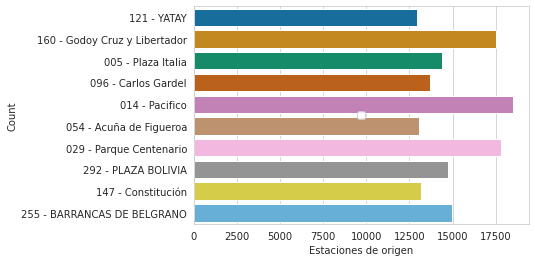

In [ ]:
top_10 = bicis_recorridos_2021_df['Nombre de estación de inicio'].value_counts()[:10]
top_10.index

subset = bicis_recorridos_2021_df[ bicis_recorridos_2021_df['Nombre de estación de inicio'].isin(top_10.index) ]
sns.set_style('whitegrid')
ax = sns.countplot( 
    y='Nombre de estación de inicio',
    data = subset,
    palette = 'colorblind'
)
ax.legend(loc=10)
plt.xlabel("Estaciones de origen")
plt.ylabel("Count")
plt.show() 

In [ ]:
bicis_recorridos_2021_df.head()

,ID,Estado cerrado,Duración,Id de estación de inicio,Fecha de inicio,Nombre de estación de inicio,Fecha de fin,Id de estación de fin de viaje,Nombre de estación de fin de viaje,ID de ciclista,Tipo de ciclista,Modelo de bicicleta,Origen de viaje
0,11204995,NORMAL,437,131,2021-06-02 16:14:35,131- HOSPITAL DE CLÍNICAS,2021-06-02 16:21:52,38.0,038 - Plaza Libertad,119795,MEMBER,ICONIC,CODE
1,11204938,NORMAL,406,387,2021-06-02 16:11:01,278 - Donato Alvarez,2021-06-02 16:17:47,262.0,349 - Plaza Saenz Peña,348428,MEMBER,ICONIC,CODE
2,11204928,NORMAL,299,232,2021-06-02 16:10:08,252 - Tamborini,2021-06-02 16:15:07,386.0,277 - Coghlan,690073,MEMBER,ICONIC,CODE
3,11204920,NORMAL,400,117,2021-06-02 16:09:34,117 - HUMBERTO 1°,2021-06-02 16:16:14,175.0,147 - Constitución,713938,MEMBER,ICONIC,CODE
4,11204919,NORMAL,591,212,2021-06-02 16:09:32,129 - Velasco,2021-06-02 16:19:23,158.0,158 - VILLARROEL,35926,MEMBER,ICONIC,CODE


In [ ]:
bicis_recorridos_2021_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328726 entries, 0 to 1328725
Data columns (total 13 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   ID                                  1328726 non-null  int64  
 1   Estado cerrado                      1328726 non-null  object 
 2   Duración                            1328726 non-null  int64  
 3   Id de estación de inicio            1328726 non-null  int64  
 4   Fecha de inicio                     1328726 non-null  object 
 5   Nombre de estación de inicio        1328726 non-null  object 
 6   Fecha de fin                        1328726 non-null  object 
 7   Id de estación de fin de viaje      1328723 non-null  float64
 8   Nombre de estación de fin de viaje  1328723 non-null  object 
 9   ID de ciclista                      1328726 non-null  int64  
 10  Tipo de ciclista                    1328726 non-null  object 
 11  Modelo de b

### Procesar fecha

Parsear object datetime a dia, mes, año

In [ ]:
bicis_recorridos_2021_df['Fecha de inicio']
formato = '%Y%m%d %H:%M:%S'
bicis_recorridos_2021_df['start datetime'] = pd.to_datetime(
    bicis_recorridos_2021_df['Fecha de inicio'], 
    format = formato
)
bicis_recorridos_2021_df['START DATE'] = bicis_recorridos_2021_df['start datetime'].dt.strftime('%Y-%m-%d')
bicis_recorridos_2021_df['MES']  = bicis_recorridos_2021_df['start datetime'].dt.strftime('%B')
bicis_recorridos_2021_df['DIA']  = bicis_recorridos_2021_df['start datetime'].dt.strftime('%A')
bicis_recorridos_2021_df['TIME'] = bicis_recorridos_2021_df['start datetime'].dt.strftime('%H:%M')

In [ ]:
bicis_recorridos_2021_df.head()

,ID,Estado cerrado,Duración,Id de estación de inicio,Fecha de inicio,Nombre de estación de inicio,Fecha de fin,Id de estación de fin de viaje,Nombre de estación de fin de viaje,ID de ciclista,Tipo de ciclista,Modelo de bicicleta,Origen de viaje,start datetime,START DATE,MES,DIA,TIME
0,11204995,NORMAL,437,131,2021-06-02 16:14:35,131- HOSPITAL DE CLÍNICAS,2021-06-02 16:21:52,38.0,038 - Plaza Libertad,119795,MEMBER,ICONIC,CODE,2021-06-02 16:14:35,2021-06-02,June,Wednesday,16:14
1,11204938,NORMAL,406,387,2021-06-02 16:11:01,278 - Donato Alvarez,2021-06-02 16:17:47,262.0,349 - Plaza Saenz Peña,348428,MEMBER,ICONIC,CODE,2021-06-02 16:11:01,2021-06-02,June,Wednesday,16:11
2,11204928,NORMAL,299,232,2021-06-02 16:10:08,252 - Tamborini,2021-06-02 16:15:07,386.0,277 - Coghlan,690073,MEMBER,ICONIC,CODE,2021-06-02 16:10:08,2021-06-02,June,Wednesday,16:10
3,11204920,NORMAL,400,117,2021-06-02 16:09:34,117 - HUMBERTO 1°,2021-06-02 16:16:14,175.0,147 - Constitución,713938,MEMBER,ICONIC,CODE,2021-06-02 16:09:34,2021-06-02,June,Wednesday,16:09
4,11204919,NORMAL,591,212,2021-06-02 16:09:32,129 - Velasco,2021-06-02 16:19:23,158.0,158 - VILLARROEL,35926,MEMBER,ICONIC,CODE,2021-06-02 16:09:32,2021-06-02,June,Wednesday,16:09


## Filtrar columnas que no se usen

- Estado cerrado
- Id de estacion de inicio
- Id de estacion de final
- Fecha de fin
- Modelo de bicicleta
- Origen de viaje

### Chequear
- Tipo de ciclista? Solo hay categoria member
- Origen de viaje? Code o Key Card o Mobile solo registros con code

In [ ]:
modelos_de_bicicleta = bicis_recorridos_2021_df['Modelo de bicicleta'].unique()
print('Modelos de bicicleta: '+ modelos_de_bicicleta.__str__())
tipos_de_ciclista = bicis_recorridos_2021_df['Tipo de ciclista'].unique()
print('Tipos de ciclista: '+ tipos_de_ciclista.__str__())
origen_de_viaje = bicis_recorridos_2021_df['Origen de viaje'].unique()
print('Origenes de viaje: '+ origen_de_viaje.__str__())

Modelos de bicicleta: ['ICONIC']
Tipos de ciclista: ['MEMBER']
Origenes de viaje: ['CODE' 'KEYCARD' 'MOBILE']


In [ ]:
bicis_recorridos_2021_df = bicis_recorridos_2021_df.drop(['Estado cerrado','Id de estación de inicio','Id de estación de fin de viaje','Modelo de bicicleta','Origen de viaje','Fecha de fin','Tipo de ciclista'], axis= 1)
#bicis_recorridos_2021_df['Id de estación de fin de viaje']
bicis_recorridos_2021_df.head()

,ID,Duración,Fecha de inicio,Nombre de estación de inicio,Nombre de estación de fin de viaje,ID de ciclista,start datetime,START DATE,MES,DIA,TIME
0,11204995,437,2021-06-02 16:14:35,131- HOSPITAL DE CLÍNICAS,038 - Plaza Libertad,119795,2021-06-02 16:14:35,2021-06-02,June,Wednesday,16:14
1,11204938,406,2021-06-02 16:11:01,278 - Donato Alvarez,349 - Plaza Saenz Peña,348428,2021-06-02 16:11:01,2021-06-02,June,Wednesday,16:11
2,11204928,299,2021-06-02 16:10:08,252 - Tamborini,277 - Coghlan,690073,2021-06-02 16:10:08,2021-06-02,June,Wednesday,16:10
3,11204920,400,2021-06-02 16:09:34,117 - HUMBERTO 1°,147 - Constitución,713938,2021-06-02 16:09:34,2021-06-02,June,Wednesday,16:09
4,11204919,591,2021-06-02 16:09:32,129 - Velasco,158 - VILLARROEL,35926,2021-06-02 16:09:32,2021-06-02,June,Wednesday,16:09


In [ ]:
#bicis_recorridos_2021_df = bicis_recorridos_2021_df.drop(['Id de estación de fin de viaje'], axis= 1)
#bicis_recorridos_2021_df

,ID,Duración,Fecha de inicio,Nombre de estación de inicio,Nombre de estación de fin de viaje,ID de ciclista,start datetime,START DATE,MES,DIA,TIME
0,11204995,437,2021-06-02 16:14:35,131- HOSPITAL DE CLÍNICAS,038 - Plaza Libertad,119795,2021-06-02 16:14:35,2021-06-02,June,Wednesday,16:14
1,11204938,406,2021-06-02 16:11:01,278 - Donato Alvarez,349 - Plaza Saenz Peña,348428,2021-06-02 16:11:01,2021-06-02,June,Wednesday,16:11
2,11204928,299,2021-06-02 16:10:08,252 - Tamborini,277 - Coghlan,690073,2021-06-02 16:10:08,2021-06-02,June,Wednesday,16:10
3,11204920,400,2021-06-02 16:09:34,117 - HUMBERTO 1°,147 - Constitución,713938,2021-06-02 16:09:34,2021-06-02,June,Wednesday,16:09
4,11204919,591,2021-06-02 16:09:32,129 - Velasco,158 - VILLARROEL,35926,2021-06-02 16:09:32,2021-06-02,June,Wednesday,16:09
...,...,...,...,...,...,...,...,...,...,...,...
1328721,9646396,690,2021-01-01 00:09:43,292 - PLAZA BOLIVIA,044 - Ecoparque,62246,2021-01-01 00:09:43,2021-01-01,January,Friday,00:09
1328722,9646395,1360,2021-01-01 00:08:40,079 - AZUCENA VILLAFLOR,168 - Estados Unidos,445201,2021-01-01 00:08:40,2021-01-01,January,Friday,00:08
1328723,9646394,1169,2021-01-01 00:08:37,079 - AZUCENA VILLAFLOR,008 - Congreso,554162,2021-01-01 00:08:37,2021-01-01,January,Friday,00:08
1328724,9646393,1031,2021-01-01 00:06:50,079 - AZUCENA VILLAFLOR,075 - Plaza Primero de Mayo,51005,2021-01-01 00:06:50,2021-01-01,January,Friday,00:06


In [ ]:
aux_list_2d_inicio = pd.DataFrame(bicis_recorridos_2021_df['Nombre de estación de inicio'].str.split('-').tolist(), columns =['Id de estación de incio','Nombre de estación de inicio'])
aux_list_2d_inicio['Nombre de estación de inicio'] = aux_list_2d_inicio['Nombre de estación de inicio'].str.lower()
aux_list_2d_inicio


,Id de estación de incio,Nombre de estación de inicio
0,131,hospital de clínicas
1,278,donato alvarez
2,252,tamborini
3,117,humberto 1°
4,129,velasco
...,...,...
1328721,292,plaza bolivia
1328722,079,azucena villaflor
1328723,079,azucena villaflor
1328724,079,azucena villaflor


Aca divido la columna Nombre de estacion de fin de viaje porque contiene dos campos el Id y el nombre de la estacion de inicio de viaje. Hay que validar que no haya registros Nan

In [ ]:
bicis_recorridos_2021_df['Nombre de estación de fin de viaje'] = bicis_recorridos_2021_df['Nombre de estación de fin de viaje'].replace(np.nan, '0 - null')
bicis_recorridos_2021_df['Nombre de estación de fin de viaje'].isna().sum()
aux_list_2d_fin = pd.DataFrame(bicis_recorridos_2021_df['Nombre de estación de fin de viaje'].str.split('-').tolist(), columns =['Id de estación destino','Nombre de estación destino'])
aux_list_2d_fin['Nombre de estación destino'] = aux_list_2d_fin['Nombre de estación destino'].str.lower()
aux_list_2d_fin

,Id de estación destino,Nombre de estación destino
0,038,plaza libertad
1,349,plaza saenz peña
2,277,coghlan
3,147,constitución
4,158,villarroel
...,...,...
1328721,044,ecoparque
1328722,168,estados unidos
1328723,008,congreso
1328724,075,plaza primero de mayo


Voy a borrar las columnas que fueron normalizadas y agregar lo spliteado al dataframe original


In [ ]:
bicis_recorridos_2021_df = bicis_recorridos_2021_df.drop(['Nombre de estación de inicio','Nombre de estación de fin de viaje'], axis= 1)
test = pd.concat([bicis_recorridos_2021_df,aux_list_2d_fin, aux_list_2d_inicio ], axis= 1)
test.head()

,ID,Duración,Fecha de inicio,ID de ciclista,start datetime,START DATE,MES,DIA,TIME,Id de estación destino,Nombre de estación destino,Id de estación de incio,Nombre de estación de inicio
0,11204995,437,2021-06-02 16:14:35,119795,2021-06-02 16:14:35,2021-06-02,June,Wednesday,16:14,038,plaza libertad,131,hospital de clínicas
1,11204938,406,2021-06-02 16:11:01,348428,2021-06-02 16:11:01,2021-06-02,June,Wednesday,16:11,349,plaza saenz peña,278,donato alvarez
2,11204928,299,2021-06-02 16:10:08,690073,2021-06-02 16:10:08,2021-06-02,June,Wednesday,16:10,277,coghlan,252,tamborini
3,11204920,400,2021-06-02 16:09:34,713938,2021-06-02 16:09:34,2021-06-02,June,Wednesday,16:09,147,constitución,117,humberto 1°
4,11204919,591,2021-06-02 16:09:32,35926,2021-06-02 16:09:32,2021-06-02,June,Wednesday,16:09,158,villarroel,129,velasco


In [ ]:
bicis_recorridos_2021_df = bicis_recorridos_2021_df.drop(['start datetime'], axis= 1)

In [ ]:
compression_opts = dict(method='zip',archive_name='recorridos_2021-cleaned.csv')  
bicis_recorridos_2021_df.to_csv('recorridos_2021-celaned.zip', index=False,compression=compression_opts)

In [ ]:
from google.colab import files
files.download('recorridos_2021-celaned.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Agrego datos del clima queda por hacer

In [ ]:
weather_data_df = pd.read_csv('../sets/weather-data-ba.csv')
filtered_weather_df = weather_data_df.filter(['DATE','PRCP','TAVG'])
filtered_weather_df.isnull().sum(axis=0)
#filtered_weather_df['PRCP'] = filtered_weather_df['PRCP'].replace(np.nan, 0)

FileNotFoundError: ignored

In [ ]:
merged_inner = pd.merge(left=bicis_recorridos_2021_df, right=filtered_weather_df, left_on='START DATE', right_on='DATE')

In [ ]:
merged_inner[merged_inner['PRCP'] != np.nan]

,ID,Estado cerrado,Duración,Id de estación de inicio,Fecha de inicio,Nombre de estación de inicio,Fecha de fin,Id de estación de fin de viaje,Nombre de estación de fin de viaje,ID de ciclista,...,Modelo de bicicleta,Origen de viaje,start datetime,START DATE,MES,DIA,TIME,DATE,PRCP,TAVG
0,11204995,NORMAL,437,131,2021-06-02 16:14:35,131- HOSPITAL DE CLÍNICAS,2021-06-02 16:21:52,38.0,038 - Plaza Libertad,119795,...,ICONIC,CODE,2021-06-02 16:14:35,2021-06-02,June,Wednesday,16:14,2021-06-02,0.0,14.6
1,11204938,NORMAL,406,387,2021-06-02 16:11:01,278 - Donato Alvarez,2021-06-02 16:17:47,262.0,349 - Plaza Saenz Peña,348428,...,ICONIC,CODE,2021-06-02 16:11:01,2021-06-02,June,Wednesday,16:11,2021-06-02,0.0,14.6
2,11204928,NORMAL,299,232,2021-06-02 16:10:08,252 - Tamborini,2021-06-02 16:15:07,386.0,277 - Coghlan,690073,...,ICONIC,CODE,2021-06-02 16:10:08,2021-06-02,June,Wednesday,16:10,2021-06-02,0.0,14.6
3,11204920,NORMAL,400,117,2021-06-02 16:09:34,117 - HUMBERTO 1°,2021-06-02 16:16:14,175.0,147 - Constitución,713938,...,ICONIC,CODE,2021-06-02 16:09:34,2021-06-02,June,Wednesday,16:09,2021-06-02,0.0,14.6
4,11204919,NORMAL,591,212,2021-06-02 16:09:32,129 - Velasco,2021-06-02 16:19:23,158.0,158 - VILLARROEL,35926,...,ICONIC,CODE,2021-06-02 16:09:32,2021-06-02,June,Wednesday,16:09,2021-06-02,0.0,14.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307713,9646396,NORMAL,690,277,2021-01-01 00:09:43,292 - PLAZA BOLIVIA,2021-01-01 00:21:13,44.0,044 - Ecoparque,62246,...,ICONIC,CODE,2021-01-01 00:09:43,2021-01-01,January,Friday,00:09,2021-01-01,NaN,25.3
1307714,9646395,NORMAL,1360,79,2021-01-01 00:08:40,079 - AZUCENA VILLAFLOR,2021-01-01 00:31:20,168.0,168 - Estados Unidos,445201,...,ICONIC,CODE,2021-01-01 00:08:40,2021-01-01,January,Friday,00:08,2021-01-01,NaN,25.3
1307715,9646394,NORMAL,1169,79,2021-01-01 00:08:37,079 - AZUCENA VILLAFLOR,2021-01-01 00:28:06,8.0,008 - Congreso,554162,...,ICONIC,CODE,2021-01-01 00:08:37,2021-01-01,January,Friday,00:08,2021-01-01,NaN,25.3
1307716,9646393,NORMAL,1031,79,2021-01-01 00:06:50,079 - AZUCENA VILLAFLOR,2021-01-01 00:24:01,75.0,075 - Plaza Primero de Mayo,51005,...,ICONIC,CODE,2021-01-01 00:06:50,2021-01-01,January,Friday,00:06,2021-01-01,NaN,25.3


In [ ]:
 merged_inner['PRCP'] = merged_inner['PRCP'].replace(np.nan, 0)

In [ ]:
merged_inner.isnull().sum(axis=0)

ID                                    0
Estado cerrado                        0
Duración                              0
Id de estación de inicio              0
Fecha de inicio                       0
Nombre de estación de inicio          0
Fecha de fin                          0
Id de estación de fin de viaje        3
Nombre de estación de fin de viaje    3
ID de ciclista                        0
Tipo de ciclista                      0
Modelo de bicicleta                   0
Origen de viaje                       0
start datetime                        0
START DATE                            0
MES                                   0
DIA                                   0
TIME                                  0
DATE                                  0
PRCP                                  0
TAVG                                  0
dtype: int64

In [ ]:
corr = merged_inner[['Duración','PRCP', 'TAVG', 'Id de estación de inicio']].corr()

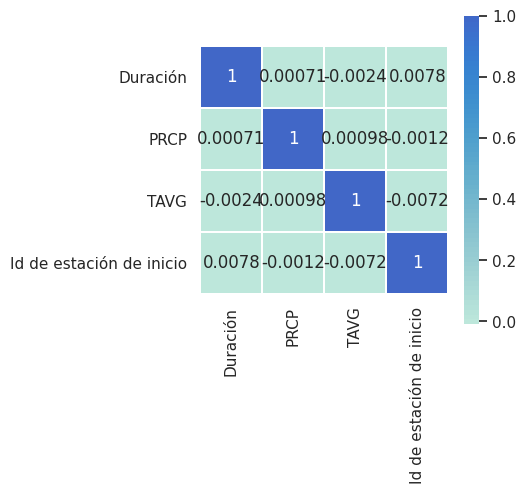

In [ ]:
f,axes = plt.subplots(1,1,figsize = (4,4))
sns.heatmap(corr,square=True,annot = True,linewidth = .5,center = 2,ax = axes)
plt.show()